## **Imports**

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm

## **Cargar archivos**

In [2]:
# CSV COVID-19
ruta_covid = "../../Data/Covid-19/datos_finales.csv"
df_covid = pd.read_csv(ruta_covid)
df_covid.head()

,Comuna,Año,Población,Casos confirmados,Porcentaje promedio de cobertura de casos sospechosos,Total de casos positivos según el test PCR,Vacunados 1ra dosis,Vacunados 2da dosis,Vacunados dosis de refuerzo,Vacunados 4ta dosis,Vacunados unica dosis,Fallecidos por covid-19,Total fallecidos,Cant de transacciones BIP en 2020,% Vacunados 1ra dosis,% Vacunados 2da dosis,% Vacunados 4ta dosis,% Vacunados dosis de refuerzo,% Fallecidos COVID,% Casos confirmados
0,Santiago,2020,423042.857143,939103.0,86.568421,73.2,1228.0,0.0,0.0,0.0,0.0,542.0,5629.0,15278353.0,0.290278,0.000000,0.000000,0.000000,0.128119,221.987674
1,Santiago,2021,426996.142857,3899492.0,88.121154,403.7,338702.0,326012.0,251288.0,0.0,14865.0,416.0,25461.0,NaN,79.322028,76.350104,0.000000,58.850180,0.097425,913.238226
2,Santiago,2022,430949.428571,11079721.0,89.902564,532.1,15783.0,20733.0,73303.0,260412.0,0.0,161.0,45460.0,NaN,3.662379,4.811005,60.427508,17.009652,0.037359,2571.002597
3,Santiago,2023,434902.714286,282536.0,NaN,NaN,143.0,77.0,257.0,711.0,0.0,NaN,2924.0,NaN,0.032881,0.017705,0.163485,0.059094,NaN,64.965334
4,Cerrillos,2020,82070.142857,189656.0,93.821053,64.0,0.0,0.0,0.0,0.0,0.0,126.0,1780.0,1616394.0,0.000000,0.000000,0.000000,0.000000,0.153527,231.090130


In [3]:
# CSV Nivel Socio Económico
ruta_nse = "../../Data/Nivel socioeconomico y geografico/Dataset_Socio_RM.csv"
df_nse = pd.read_csv(ruta_nse)
df_nse.head()

,Pobreza Categoria,Pobreza_multidimensional,Año,Sistema_previsional,NSE,region,Ingreso_hogar,Comuna,id_persona,pobreza_sinte
0,No Pobreza,0.0,2017,Fonasa,Medio,13.0,924350.0,Alhué,1,No aplica
1,No Pobreza,0.0,2017,Fonasa,Medio,13.0,924350.0,Alhué,1,No aplica
2,No Pobreza,0.0,2017,Otro sistema,Medio,13.0,924350.0,Alhué,1,No aplica
3,No Pobreza,0.0,2017,Isapre,Medio,13.0,924350.0,Alhué,1,No aplica
4,No Pobreza,0.0,2017,Fonasa,Medio,13.0,924350.0,Alhué,1,No aplica


In [4]:
# CSV Prestadores de salud
ruta_egresos = "../../Data/prestadores de salud/egresos_covid_todos.csv"
df_prestadores = pd.read_csv(ruta_egresos)
df_prestadores

,Sistema,Total_egresos,Egresos_COVID,%_COVID,%_COVID_num,Año
0,ISAPRE,373379,3903,1.05 %,1.045319,2020
1,FONASA,1277952,47081,3.68 %,3.684098,2020
2,ISAPRE,413087,8343,NaN,2.020000,2021
3,FONASA,1467062,89047,NaN,6.070000,2021
4,ISAPRE,468597,4034,NaN,0.860000,2022
5,FONASA,1540096,23980,NaN,1.560000,2022


In [5]:
# CSV Censo
ruta_censo = "../../Data/censo/estimacion_poblacion_por_comunas.csv"
df_censo = pd.read_csv(ruta_censo)
df_censo.head()

,Comuna,Año,Población
0,Santiago,2017,411183.000000
1,Santiago,2018,415136.285714
2,Santiago,2019,419089.571429
3,Santiago,2020,423042.857143
4,Santiago,2021,426996.142857


## **Comunas con más casos de covid-19**

En casos de comunas, se prefiere trabajar con los porcentajes sobre el total de población, debido a que de esta forma las comunas con mayor población no acaparan siempre los primeros puestos, así se trabaja de una forma más sincera con los datos. 

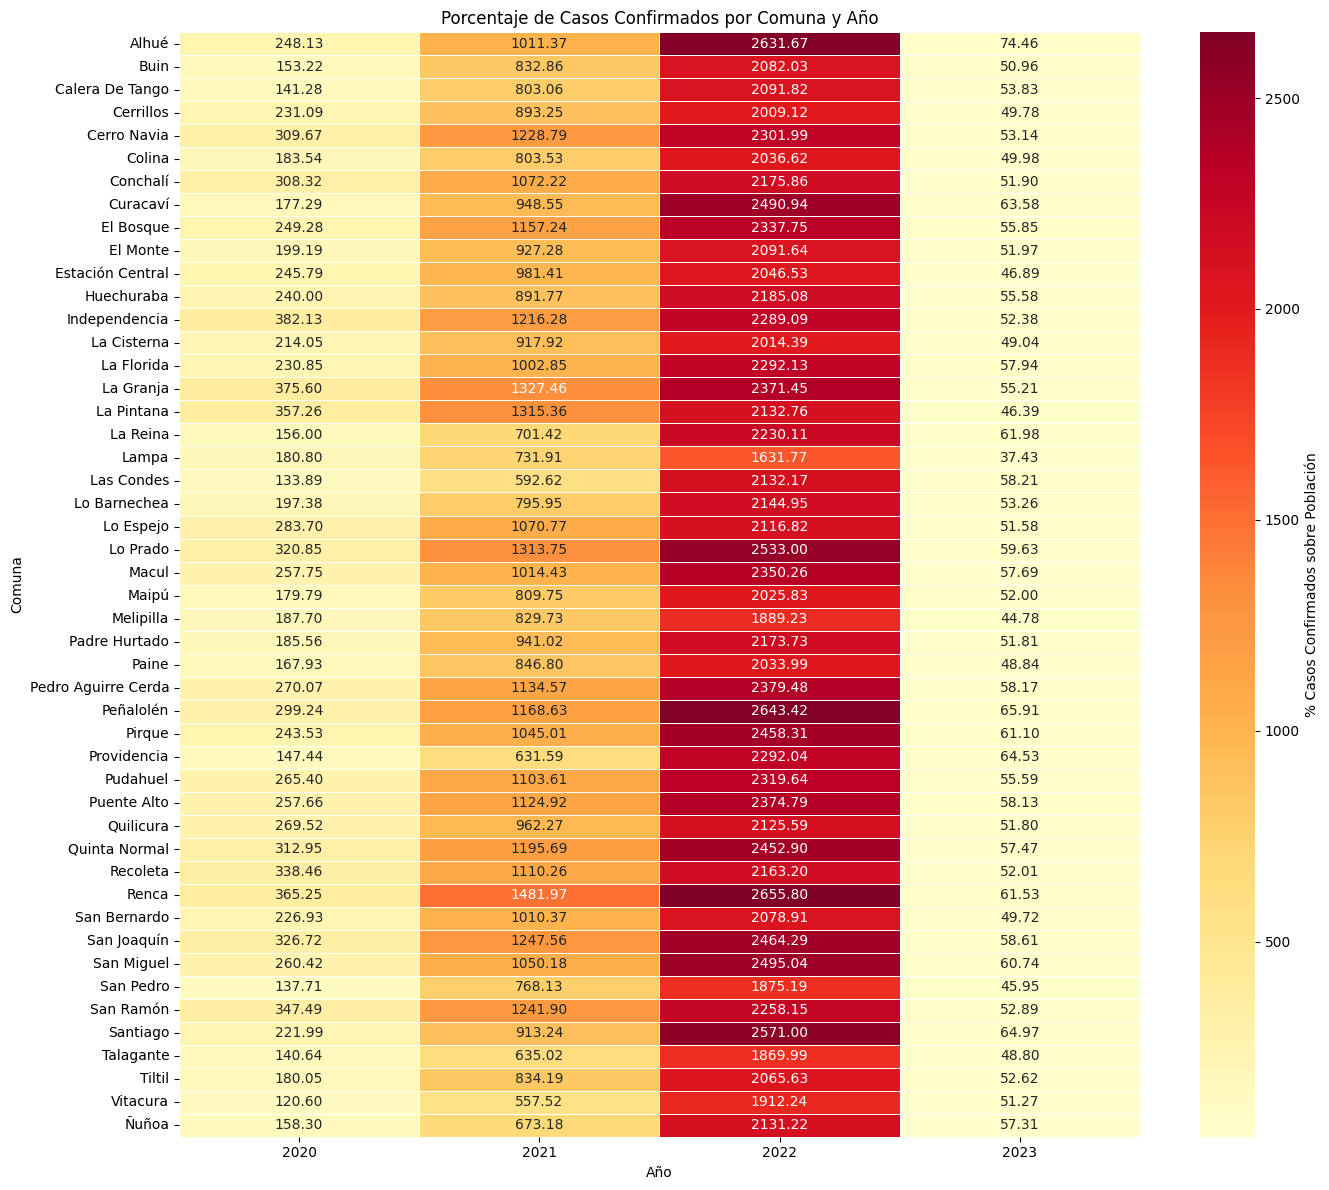

In [6]:
# Creamos un HeatMap para comparar todas las comunas

df_covid['% Casos sobre población'] = (df_covid['Casos confirmados'] / df_covid['Población']) * 100
heatmap_data_pct = df_covid.pivot(index='Comuna', columns='Año', values='% Casos sobre población')

plt.figure(figsize=(14, 12))
sns.heatmap(heatmap_data_pct, cmap='YlOrRd', annot=True, fmt='.2f', linewidths=0.5,
            cbar_kws={'label': '% Casos Confirmados sobre Población'})
plt.title('Porcentaje de Casos Confirmados por Comuna y Año')
plt.xlabel('Año')
plt.ylabel('Comuna')
plt.tight_layout()
plt.show()

Veamos las vacunaciones por comuna (%) para analizar si ambas se correlacionan:

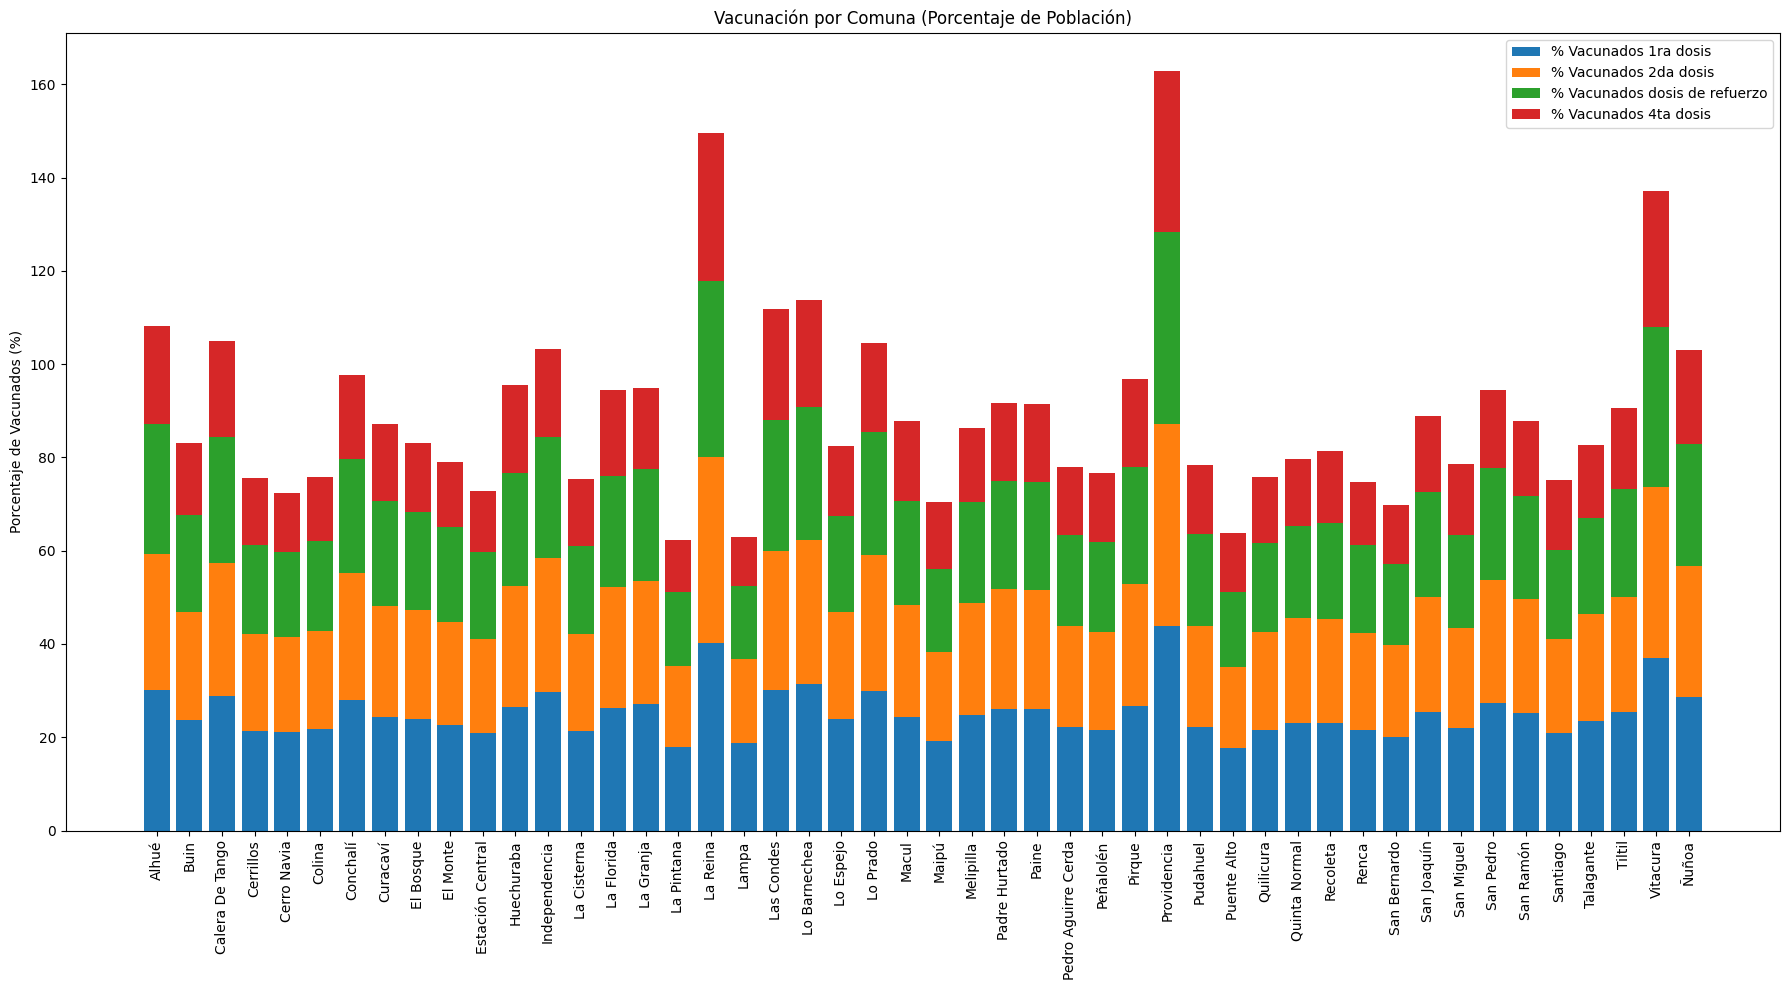

In [7]:
vacunacion_por_comuna_pct = df_covid.groupby('Comuna')[[
    '% Vacunados 1ra dosis', '% Vacunados 2da dosis',
    '% Vacunados dosis de refuerzo', '% Vacunados 4ta dosis'
]].mean()

vac_cols_pct = ['% Vacunados 1ra dosis', '% Vacunados 2da dosis', 
                '% Vacunados dosis de refuerzo', '% Vacunados 4ta dosis']
bottom = np.zeros(len(vacunacion_por_comuna_pct))

plt.figure(figsize=(18, 10))

for col in vac_cols_pct:
    plt.bar(range(len(vacunacion_por_comuna_pct)), vacunacion_por_comuna_pct[col], 
            bottom=bottom, label=col)
    bottom += vacunacion_por_comuna_pct[col].values

plt.title('Vacunación por Comuna (Porcentaje de Población)')
plt.ylabel('Porcentaje de Vacunados (%)')
plt.xticks(range(len(vacunacion_por_comuna_pct)), vacunacion_por_comuna_pct.index, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


Correlación:

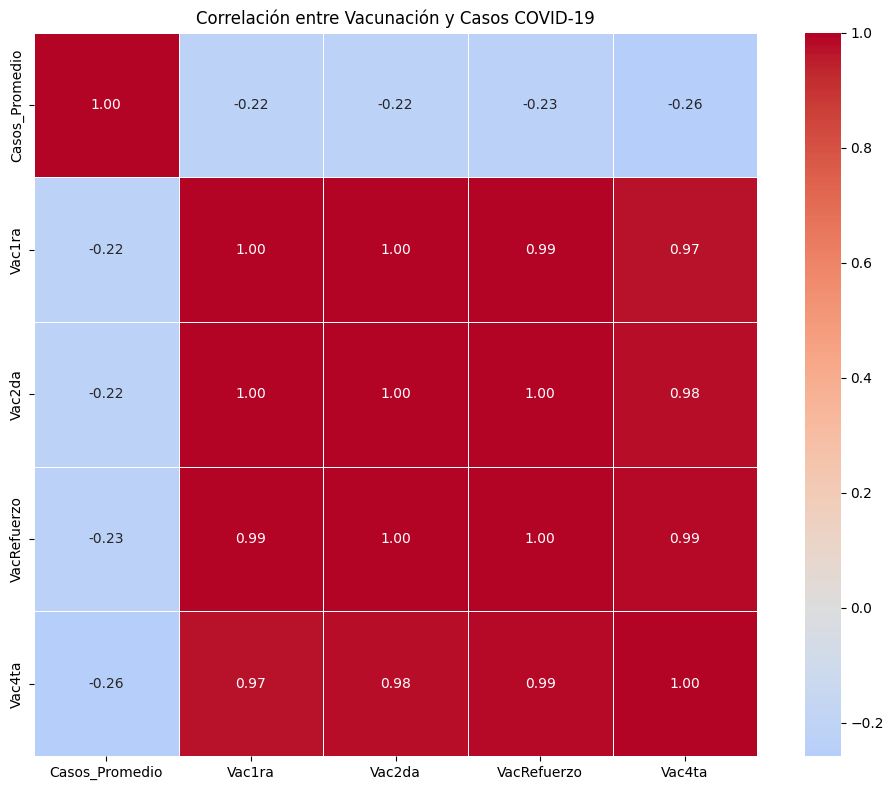

In [8]:
combinado_data = pd.DataFrame({
    'Casos_Promedio': heatmap_data_pct.mean(axis=1),
    'Vac1ra': vacunacion_por_comuna_pct['% Vacunados 1ra dosis'],
    'Vac2da': vacunacion_por_comuna_pct['% Vacunados 2da dosis'],
    'VacRefuerzo': vacunacion_por_comuna_pct['% Vacunados dosis de refuerzo'],
    'Vac4ta': vacunacion_por_comuna_pct['% Vacunados 4ta dosis']
})

# Heatmap de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(combinado_data.corr(), annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=0.5, square=True)
plt.title('Correlación entre Vacunación y Casos COVID-19')
plt.tight_layout()
plt.show()

Notamos dos cosas: la correlación entre tener la primera dosis y las que siguen es estrechamente positiva, y que la correlación entre el porcentaje de vacunación y la baja de casos promedio es débil pero existe (es decir, mientras más vacunas menos posibilidades de casos confirmados).

## **Comunas con más fallecimientos por covid-19**

En casos de comunas, se prefiere trabajar con los porcentajes sobre el total de población, debido a que de esta forma las comunas con mayor población no acaparan siempre los primeros puestos, así se trabaja de una forma más sincera con los datos. 

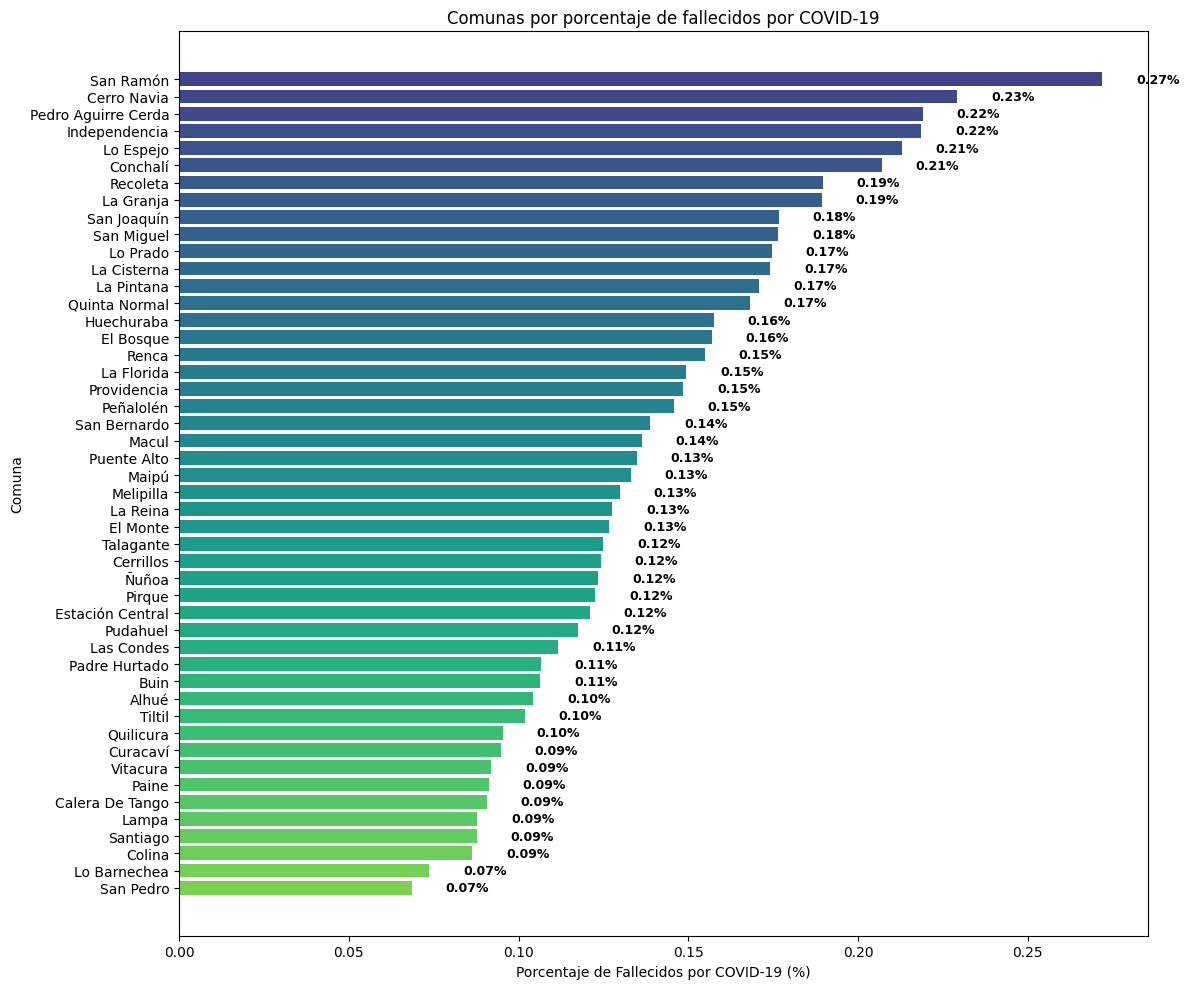

In [9]:
porcentaje_por_comuna = df_covid.groupby('Comuna')['% Fallecidos COVID'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 10))
colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(porcentaje_por_comuna)))

bars = plt.barh(range(len(porcentaje_por_comuna)), porcentaje_por_comuna, color=colors)
plt.ylabel('Comuna')
plt.xlabel('Porcentaje de Fallecidos por COVID-19 (%)')
plt.title('Comunas por porcentaje de fallecidos por COVID-19')
plt.yticks(range(len(porcentaje_por_comuna)), porcentaje_por_comuna.index)

# Añadir etiquetas
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2, f'{width:.2f}%', 
             ha='left', va='center', fontweight='bold', fontsize=9)

plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

De todas formas, veamos una comparación del total de muertes junto a el porcentaje de fallecidos por comuna:

C:\Users\isimo\AppData\Local\Temp\ipykernel_8232\1037090708.py:9: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro-" (-> color='r'). The keyword argument will take precedence.
  line = ax2.plot(fallecidos_por_comuna.values, x, 'ro-', linewidth=2, markersize=6,


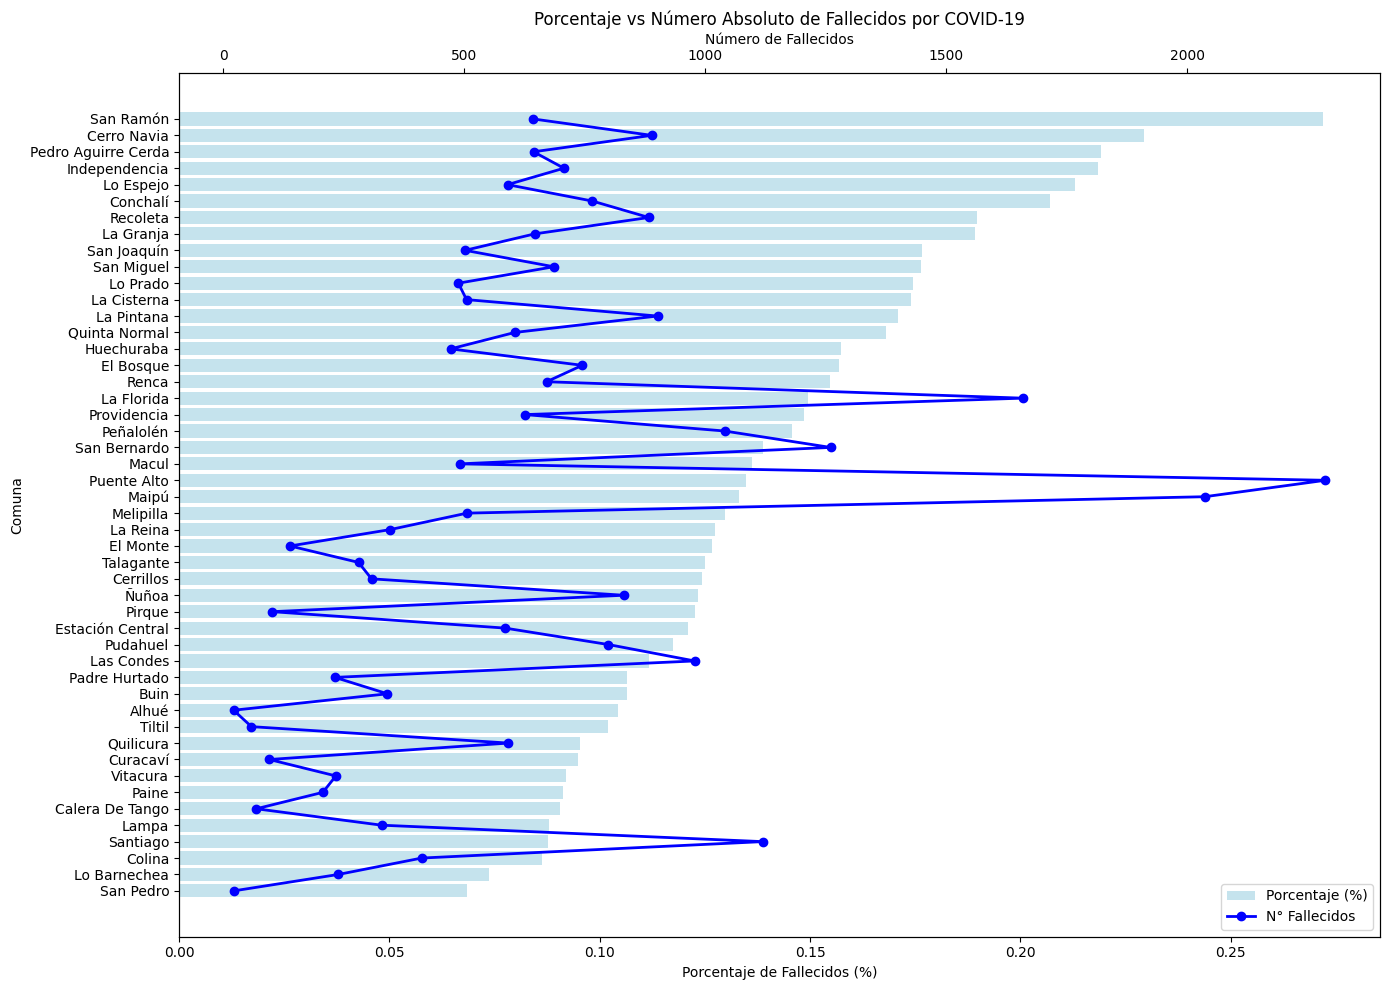

In [10]:
fig, ax1 = plt.subplots(figsize=(14, 10))
comunas_ordenadas = porcentaje_por_comuna.index
fallecidos_por_comuna = df_covid.groupby('Comuna')['Fallecidos por covid-19'].sum().reindex(comunas_ordenadas)
x = range(len(comunas_ordenadas))
bars = ax1.barh(x, porcentaje_por_comuna, alpha=0.7, color='lightblue', label='Porcentaje (%)')
ax1.set_xlabel('Porcentaje de Fallecidos (%)')
ax1.set_ylabel('Comuna')
ax2 = ax1.twiny()
line = ax2.plot(fallecidos_por_comuna.values, x, 'ro-', linewidth=2, markersize=6, 
                label='N° Fallecidos', color='b')
ax2.set_xlabel('Número de Fallecidos')
plt.yticks(x, comunas_ordenadas)
plt.title('Porcentaje vs Número Absoluto de Fallecidos por COVID-19')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='lower right')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## **Heatmap % vacunaciones por población vs muertes**

Veamos la correlación entre las muertes y la cantidad de vacunados:

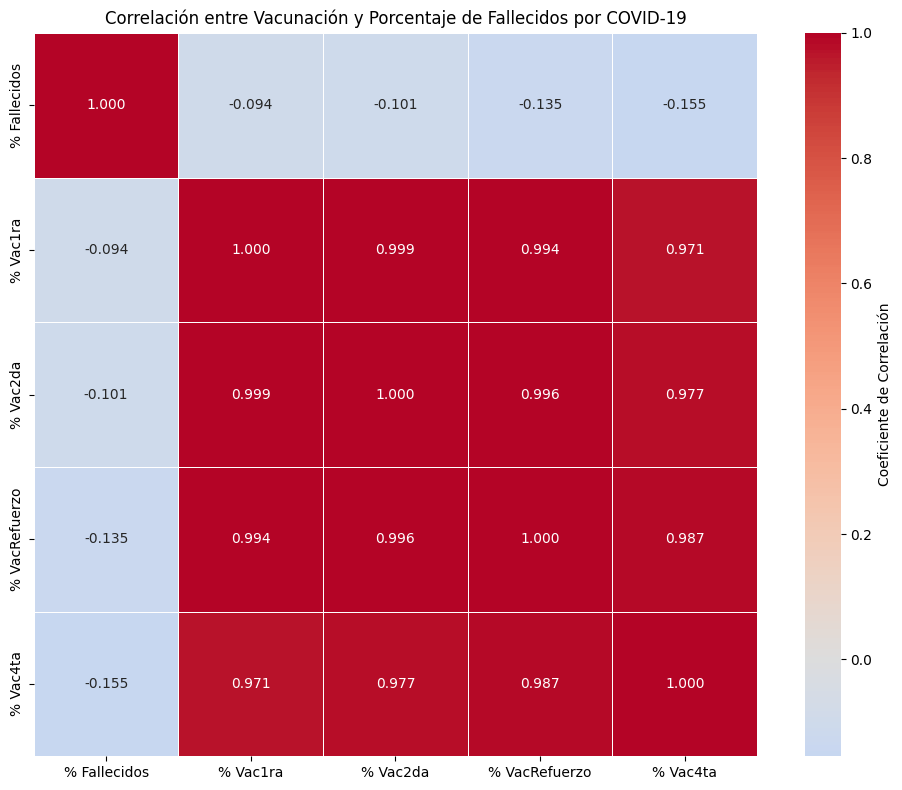

In [11]:
# Combinar los datos de fallecidos y vacunación
fallecidos_por_comuna = df_covid.groupby('Comuna')['% Fallecidos COVID'].mean()
vacunacion_por_comuna = df_covid.groupby('Comuna')[[
    '% Vacunados 1ra dosis', '% Vacunados 2da dosis',
    '% Vacunados dosis de refuerzo', '% Vacunados 4ta dosis'
]].mean()

combinado_mortalidad = pd.DataFrame({
    '% Fallecidos': fallecidos_por_comuna,
    '% Vac1ra': vacunacion_por_comuna['% Vacunados 1ra dosis'],
    '% Vac2da': vacunacion_por_comuna['% Vacunados 2da dosis'],
    '% VacRefuerzo': vacunacion_por_comuna['% Vacunados dosis de refuerzo'],
    '% Vac4ta': vacunacion_por_comuna['% Vacunados 4ta dosis']
})
corr_mortalidad = combinado_mortalidad.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_mortalidad, annot=True, cmap='coolwarm', center=0, 
            fmt='.3f', linewidths=0.5, square=True,
            cbar_kws={'label': 'Coeficiente de Correlación'})
plt.title('Correlación entre Vacunación y Porcentaje de Fallecidos por COVID-19')
plt.tight_layout()
plt.show()

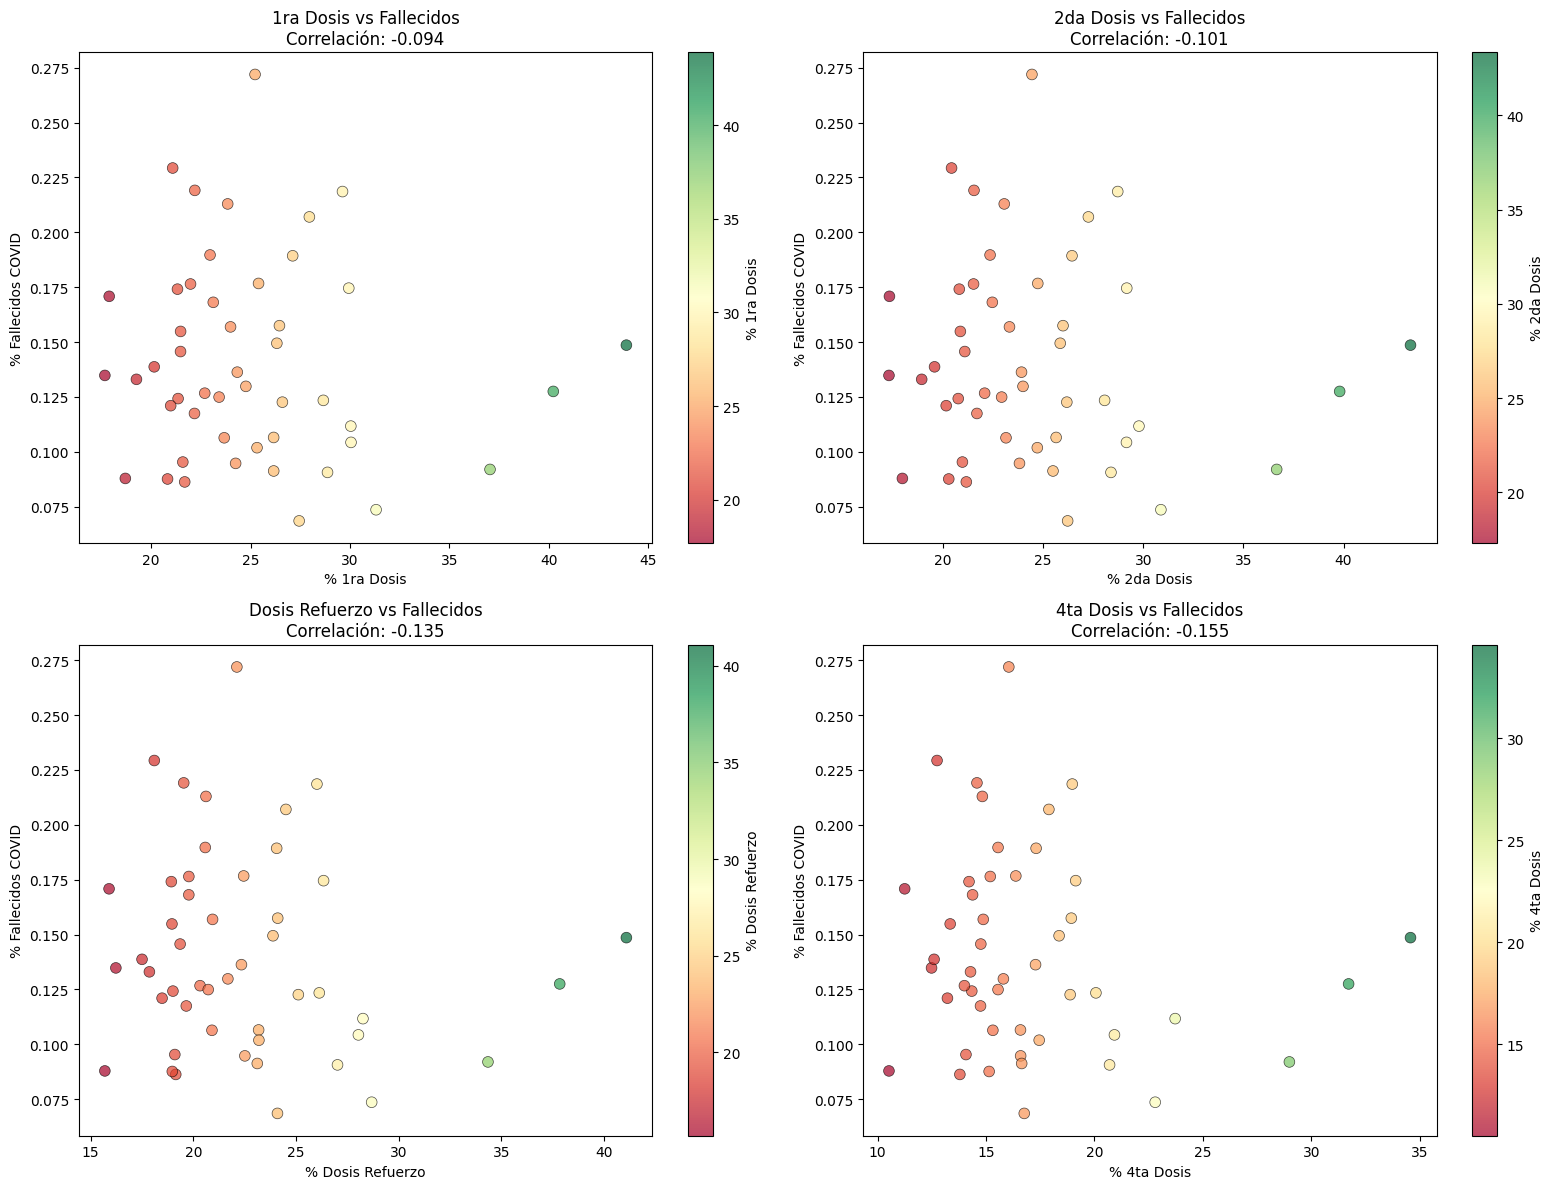

In [12]:
# Creemos gráficos para comparar la tasa de mortalidad junto a la cantidad de vacunados por comuna para comprobar si es que existe relación.

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

dosis_vacunas = ['% Vac1ra', '% Vac2da', '% VacRefuerzo', '% Vac4ta']
nombres_vacunas = ['1ra Dosis', '2da Dosis', 'Dosis Refuerzo', '4ta Dosis']

for i, (dosis, nombre) in enumerate(zip(dosis_vacunas, nombres_vacunas)):
    vacunacion_values = combinado_mortalidad[dosis]
    colors = plt.cm.RdYlGn((vacunacion_values - vacunacion_values.min()) / 
                          (vacunacion_values.max() - vacunacion_values.min()))
    scatter = axes[i].scatter(combinado_mortalidad[dosis], 
                             combinado_mortalidad['% Fallecidos'],
                             c=vacunacion_values, cmap='RdYlGn', 
                             s=60, alpha=0.7, edgecolors='black', linewidth=0.5)
    corr_val = corr_mortalidad.loc['% Fallecidos', dosis]
    axes[i].set_xlabel(f'% {nombre}')
    axes[i].set_ylabel('% Fallecidos COVID')
    axes[i].set_title(f'{nombre} vs Fallecidos\nCorrelación: {corr_val:.3f}')
    cbar = plt.colorbar(scatter, ax=axes[i])
    cbar.set_label(f'% {nombre}')

plt.tight_layout()
plt.show()

Gracias al heatmap y los gráficos, notamos que no hay una clara relación entre ambos, es decir, no parece que una variable conlleve necesariamente a la otra, ya que los datos son dispersos.

## **Heatmap Positividad de covid-19 vs muertes**

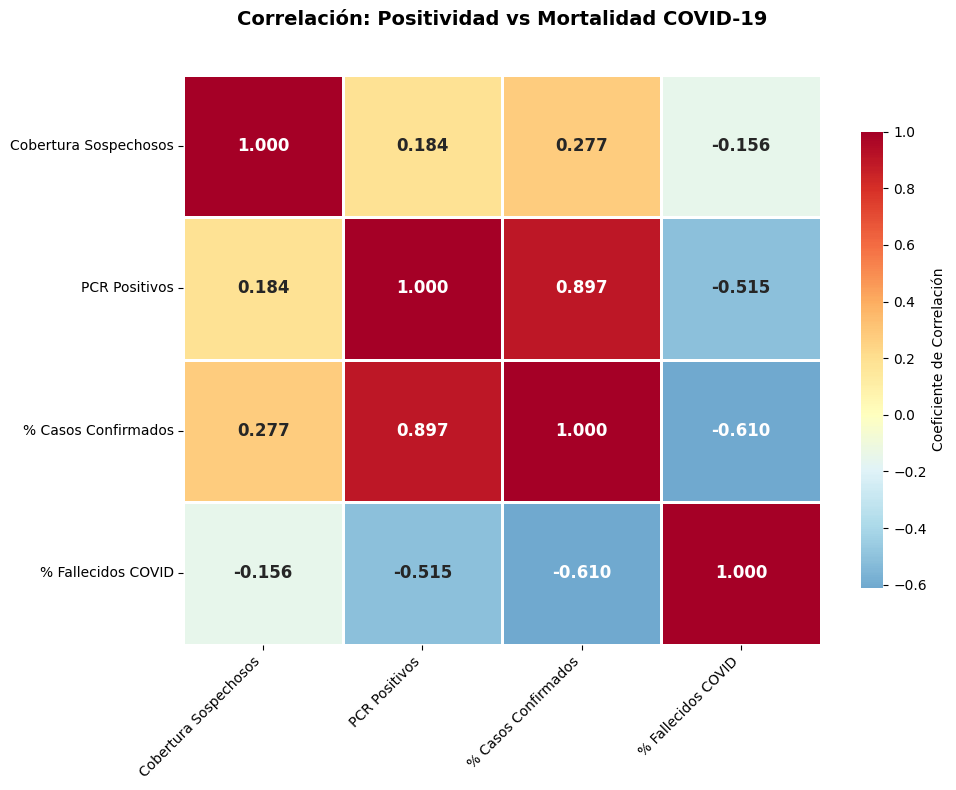

In [13]:
# Variables a usar
variables_positividad = [
    'Porcentaje promedio de cobertura de casos sospechosos',
    'Total de casos positivos según el test PCR', 
    '% Casos confirmados',
    '% Fallecidos COVID'
]

corr_positividad = df_covid[variables_positividad].corr()
nombres_cortos = {
    'Porcentaje promedio de cobertura de casos sospechosos': 'Cobertura Sospechosos',
    'Total de casos positivos según el test PCR': 'PCR Positivos', 
    '% Casos confirmados': '% Casos Confirmados',
    '% Fallecidos COVID': '% Fallecidos COVID'
}
corr_positividad_clean = corr_positividad.rename(index=nombres_cortos, columns=nombres_cortos)

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_positividad_clean, 
            annot=True, 
            cmap='RdYlBu_r', 
            center=0,
            fmt='.3f', 
            linewidths=1, 
            linecolor='white',
            cbar_kws={'label': 'Coeficiente de Correlación', 'shrink': 0.8},
            annot_kws={'size': 12, 'weight': 'bold'})

plt.title('Correlación: Positividad vs Mortalidad COVID-19\n', 
          fontsize=14, 
          fontweight='bold', 
          pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

Notamos que a más cobertura mayor cantidad de PCR positivos (lo cual tiene sentido), mayor % de casos confirmados, y menor % fallecidos, todo esto a un nivel de baja correlación. Sin embargo, a más casos de % fallecidos, menos % de casos confirmados y menos PCR positivos con una correlación más fuerte. 

## **Heatmap NSE por comuna**

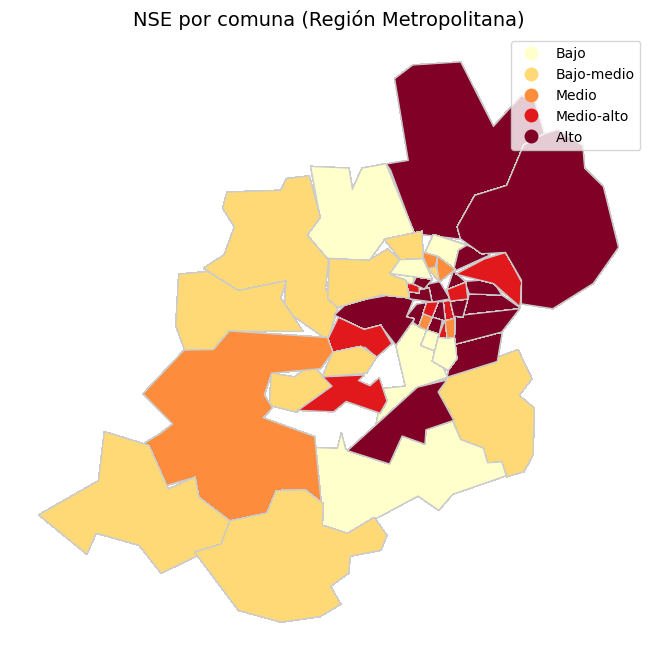

In [14]:

# Cargar el mapa de comuns
geo = gpd.read_file("../../Data/Extra_Data/comunas.geojson")

# Filtrar la Región Metropolitana
geo_rm = geo[geo["codregion"] == 13].copy()

# Unir los df
geo_nse = geo_rm.merge(df_nse[["Comuna", "NSE"]], on="Comuna", how="left")

# Ordenar NSE
orden_nse = ['Bajo', 'Bajo-medio', 'Medio', 'Medio-alto', 'Alto']
geo_nse["NSE"] = pd.Categorical(geo_nse["NSE"], categories=orden_nse, ordered=True)

# Graficar
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

geo_nse.plot(
    column="NSE",
    cmap="YlOrRd",
    linewidth=0.8,
    edgecolor="0.8",
    legend=True,
    ax=ax
)

ax.set_title("NSE por comuna (Región Metropolitana)", fontsize=14)
ax.axis("off")

plt.show()


## **Gráficos Sistema de salud vs mortalidad**

### **Datos necesarios para los gráficos**

In [15]:

# Limpiar df_nse
df_nse = df_nse.copy()
for c in ["Comuna", "Sistema_previsional"]:
    df_nse[c] = df_nse[c].astype(str).str.strip()

# Normalizar nombres
df_nse["Sistema_previsional"] = (
    df_nse["Sistema_previsional"]
    .str.title()
    .str.replace(r"\s+", " ", regex=True)
)

# Contar de personas por comuna y sistema
conteos = (
    df_nse.groupby(["Comuna","Sistema_previsional"])
          .size()
          .reset_index(name="n")
)

# Pivot para calcular % ISAPRE
pivot = conteos.pivot(index="Comuna", columns="Sistema_previsional", values="n").fillna(0)
for col in ["Fonasa","Isapre","Otro Sistema"]:
    if col not in pivot.columns:
        pivot[col] = 0

pivot["Total"] = pivot[["Fonasa","Isapre","Otro Sistema"]].sum(axis=1).replace(0, np.nan)
pivot["pct_isapre"] = pivot["Isapre"] / pivot["Total"] * 100

# Sistema predominante por comuna
predom = conteos.loc[conteos.groupby("Comuna")["n"].idxmax(), ["Comuna","Sistema_previsional"]]
predom = predom.rename(columns={"Sistema_previsional": "Sistema_predominante"})

sist_comuna = pivot.reset_index().merge(predom, on="Comuna", how="left")

# Calcular mortalidad comuna
df_covid = df_covid.copy()
df_covid = df_covid[df_covid["Año"].between(2020, 2022)]

mortalidad = (
    df_covid.groupby("Comuna", as_index=False)
            .agg({"Fallecidos por covid-19":"sum", "Total fallecidos":"sum"})
)
mortalidad["mort_covid_%"] = mortalidad["Fallecidos por covid-19"] / mortalidad["Total fallecidos"] * 100

# Unir
df_plot = sist_comuna.merge(mortalidad, on="Comuna", how="left")


### **Boxplot**

C:\Users\isimo\AppData\Local\Temp\ipykernel_8232\3430861733.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_plot, x="Sistema_predominante", y="mort_covid_%", palette="pastel")


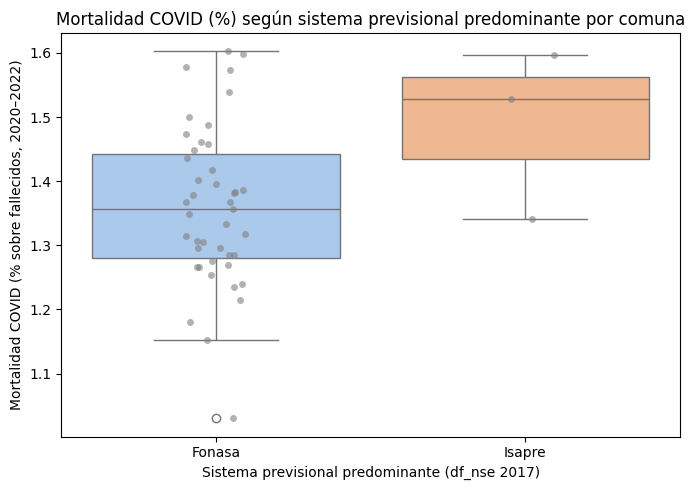

In [16]:

# Boxplot: mortalidad según sistema predominante
plt.figure(figsize=(7,5))
sns.boxplot(data=df_plot, x="Sistema_predominante", y="mort_covid_%", palette="pastel")
sns.stripplot(data=df_plot, x="Sistema_predominante", y="mort_covid_%", color="gray", alpha=0.6)
plt.title("Mortalidad COVID (%) según sistema previsional predominante por comuna")
plt.xlabel("Sistema previsional predominante (df_nse 2017)")
plt.ylabel("Mortalidad COVID (% sobre fallecidos, 2020–2022)")
plt.tight_layout()
plt.show()


### **Gráfico de dispersión % Isapre vs mortalidad**

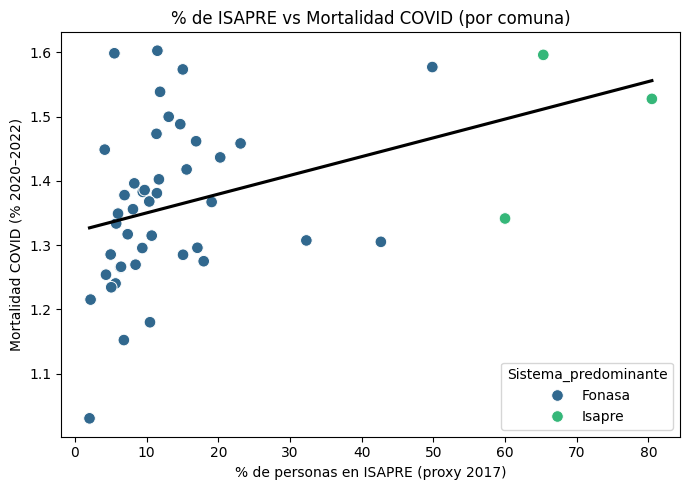

Correlación %ISAPRE ↔ mortalidad COVID: 0.392


In [17]:
# Dispersión: % ISAPRE vs mortalidad
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_plot, x="pct_isapre", y="mort_covid_%", hue="Sistema_predominante", palette="viridis", s=70)
sns.regplot(data=df_plot, x="pct_isapre", y="mort_covid_%", scatter=False, color="black", ci=None)
plt.title("% de ISAPRE vs Mortalidad COVID (por comuna)")
plt.xlabel("% de personas en ISAPRE (proxy 2017)")
plt.ylabel("Mortalidad COVID (% 2020–2022)")
plt.tight_layout()
plt.show()

# Correlación numérica
corr = df_plot[["pct_isapre", "mort_covid_%"]].corr().iloc[0,1]
print(f"Correlación %ISAPRE ↔ mortalidad COVID: {corr:.3f}")

### **Gráfico de dispersión % Fonasa vs mortalidad**

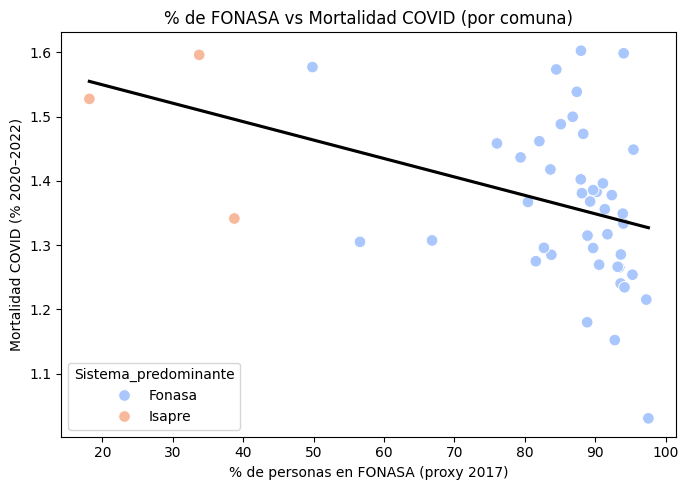

Correlación %FONASA ↔ mortalidad COVID: -0.388


In [18]:

# Dispersión: % FONASA vs mortalidad
df_plot["pct_fonasa"] = df_plot["Fonasa"] / df_plot["Total"] * 100

plt.figure(figsize=(7,5))
sns.scatterplot(data=df_plot, x="pct_fonasa", y="mort_covid_%",
                hue="Sistema_predominante", palette="coolwarm", s=70)
sns.regplot(data=df_plot, x="pct_fonasa", y="mort_covid_%", scatter=False, color="black", ci=None)
plt.title("% de FONASA vs Mortalidad COVID (por comuna)")
plt.xlabel("% de personas en FONASA (proxy 2017)")
plt.ylabel("Mortalidad COVID (% 2020–2022)")
plt.tight_layout()
plt.show()

# Correlación 
corr_fonasa = df_plot[["pct_fonasa", "mort_covid_%"]].corr().iloc[0,1]
print(f"Correlación %FONASA ↔ mortalidad COVID: {corr_fonasa:.3f}")


# Correlaciones (Liz)

###  A) ¿El nivel socioeconómico de una comuna (pobreza, ingresos) puede predecir su número de muertes por COVID-19?
Primero necesitamos modelar e identificar las variables involucradas para responder a la interrogante.

### 1. Preparar los datos

In [19]:
# Datos de muertes
path_muertes = '../../Data/Covid-19/muertes_por_anio_comunal.csv' 
try:
    df_muertes = pd.read_csv(path_muertes)
    df_muertes_2021 = df_muertes[df_muertes['Año'] == 2021.0].copy()

    # Seleccionamos solo las columnas que necesitamos
    df_muertes_2021 = df_muertes_2021[['Comuna', 'Total fallecidos']]

    # Renombramos la columna para mayor claridad
    df_muertes_2021.rename(columns={'Total fallecidos': 'Muertes_2021'}, inplace=True)

    print("Datos de muertes 2021 listos.")
    print(df_muertes_2021.head())

except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta: {path_muertes}")
    exit()


# Datos socioeconómicos
path_socio = '../../Data/Nivel socioeconomico y geografico/Dataset_Socio_RM.csv'

try:
    df_socio_raw = pd.read_csv(path_socio, low_memory=False)
    
    df_socio_2021 = df_socio_raw[df_socio_raw['Año'] == 2021].copy()

    # (1 si es 'Pobreza Extrema' o 'Pobreza No Extrema', 0 si es 'No Pobreza')
    categorias_pobreza = ['Pobreza Extrema', 'Pobreza No Extrema']
    df_socio_2021['es_pobre'] = df_socio_2021['Pobreza Categoria'].apply(lambda x: 1 if x in categorias_pobreza else 0)
    # - INDICE_POBREZA: será el promedio (mean) de la columna 'es_pobre'
    # - INGRESO_PROMEDIO: será el promedio (mean) de 'Ingreso_hogar'
    df_socio_agg = df_socio_2021.groupby('Comuna').agg(
        INDICE_POBREZA=('es_pobre', 'mean'),
        INGRESO_PROMEDIO=('Ingreso_hogar', 'mean')
    ).reset_index()

    print("Datos socioeconómicos agregados por comuna para 2021 listos.")
    print(df_socio_agg.head())

except FileNotFoundError:
    print(f"Error: No se encontró el archivo en la ruta: {path_socio}")
    exit()
except Exception as e:
    print(f"Error procesando el archivo socioeconómico: {e}")

Datos de muertes 2021 listos.
             Comuna  Muertes_2021
1             Alhué         541.0
5              Buin        8405.0
9   Calera De Tango        1573.0
13        Cerrillos        8491.0
17      Cerro Navia       21636.0
Datos socioeconómicos agregados por comuna para 2021 listos.
        Comuna  INDICE_POBREZA  INGRESO_PROMEDIO
0        Alhué        0.000000      1.163712e+06
1         Buin        0.104478      1.024474e+06
2    Cerrillos        0.100000      1.046512e+06
3  Cerro Navia        0.102740      9.880384e+05
4       Colina        0.162162      1.005093e+06


### 2. Unir los datasets y Limpieza

In [20]:
df_final = pd.merge(df_muertes_2021, df_socio_agg, on='Comuna', how='inner')
df_final.dropna(subset=['Muertes_2021', 'INDICE_POBREZA', 'INGRESO_PROMEDIO'], inplace=True)
print(f"Datos combinados listos. {df_final.shape[0]} comunas tienen datos completos.")
print(df_final.head())

Datos combinados listos. 46 comunas tienen datos completos.
        Comuna  Muertes_2021  INDICE_POBREZA  INGRESO_PROMEDIO
0        Alhué         541.0        0.000000      1.163712e+06
1         Buin        8405.0        0.104478      1.024474e+06
2    Cerrillos        8491.0        0.100000      1.046512e+06
3  Cerro Navia       21636.0        0.102740      9.880384e+05
4       Colina       10524.0        0.162162      1.005093e+06


### 3. Aplicar Regresion Lineal

Variable $Y$ (Dependiente): total_muertes_2021 (del archivo muertes_por_anio_comunal.csv).

Variables $X$ (Independientes): INDICE_POBREZA y INGRESO_PROMEDIO (del archivo Dataset_Socio_RM.csv).
Modelo:  $total\_muertes\_2021 = \beta_0 + \beta_1 \cdot INDICE\_POBREZA + \beta_2 \cdot INGRESO\_PROMEDIO + \epsilon$

In [21]:
if df_final.empty:
    print("No hay datos suficientes para ejecutar la regresión después de limpiar y unir.")
else:

    var_y = df_final['Muertes_2021']

    var_X = df_final[['INDICE_POBREZA', 'INGRESO_PROMEDIO']]
    
    # Añadir una constante (el intercepto, B0) al modelo
    var_X = sm.add_constant(var_X)
    
    # Crear el modelo OLS (Ordinary Least Squares)
    modelo = sm.OLS(var_y, var_X)
    
    # Entrenar (ajustar) el modelo
    resultados = modelo.fit()

    print(resultados.summary())

                            OLS Regression Results                            
Dep. Variable:           Muertes_2021   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                    0.3115
Date:                Mon, 10 Nov 2025   Prob (F-statistic):              0.734
Time:                        00:51:43   Log-Likelihood:                -496.01
No. Observations:                  46   AIC:                             998.0
Df Residuals:                      43   BIC:                             1003.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1.922e+04   6322.715  

### 4. Visualizacion de la regresion

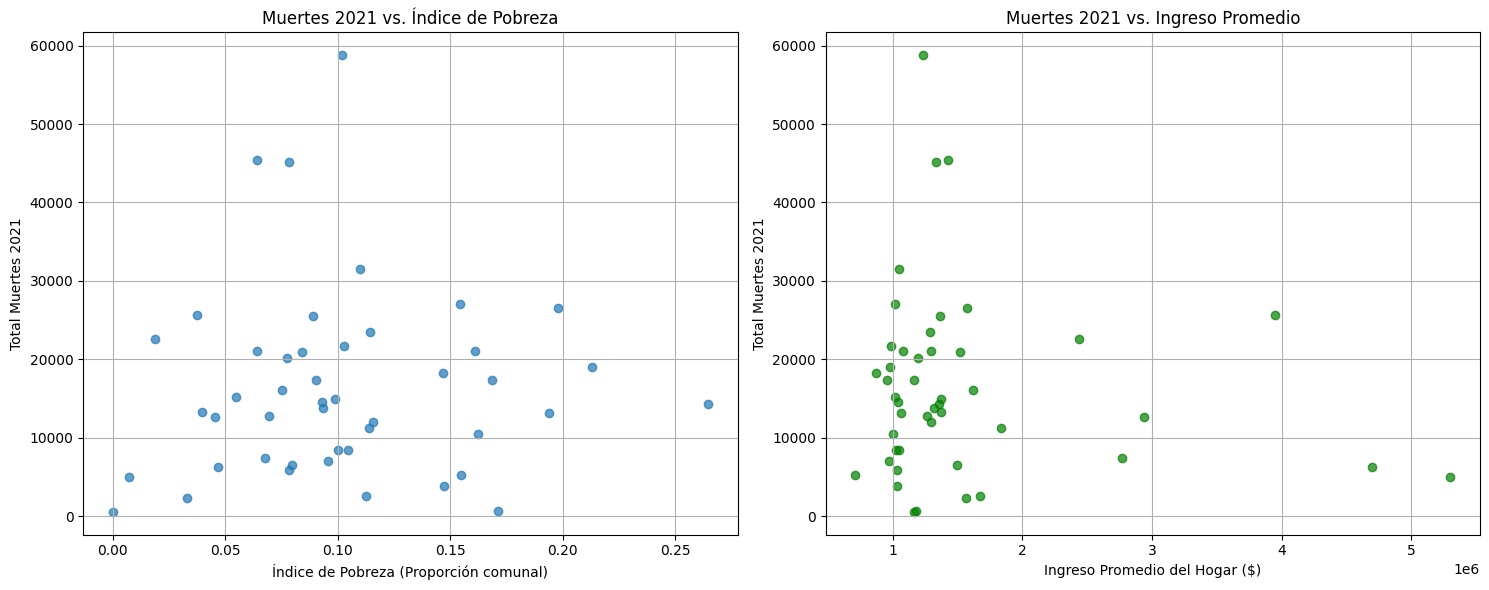

In [22]:
if not df_final.empty:
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Gráfico 1: Muertes vs. Pobreza
    ax1.scatter(df_final['INDICE_POBREZA'], df_final['Muertes_2021'], alpha=0.7)
    ax1.set_title('Muertes 2021 vs. Índice de Pobreza')
    ax1.set_xlabel('Índice de Pobreza (Proporción comunal)')
    ax1.set_ylabel('Total Muertes 2021')
    ax1.grid(True)

    # Gráfico 2: Muertes vs. Ingreso
    ax2.scatter(df_final['INGRESO_PROMEDIO'], df_final['Muertes_2021'], alpha=0.7, color='green')
    ax2.set_title('Muertes 2021 vs. Ingreso Promedio')
    ax2.set_xlabel('Ingreso Promedio del Hogar ($)')
    ax2.set_ylabel('Total Muertes 2021')
    ax2.grid(True)
    
    plt.tight_layout()
    plt.show()
else:
    print("No se pueden generar gráficos porque no hay datos.")